# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Arumugam Balasuadhakar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#neccessary packages
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 25.4 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=6e835c09b4f425e9d387d7d49b48e70ea5dfbe557048a2ae70b8345c656052a3
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking

### Dataset Loading

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
file_path = r"/content/drive/MyDrive/csv file/Machine Learning csv files/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(file_path,encoding_errors= 'replace')


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f" The dataset contains {df.shape[0]} Rows and {df.shape[1]} columns ")

 The dataset contains 7787 Rows and 12 columns 


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [9]:
# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = round(df.isnull().sum()/len(df),4)
print(f"{null_count_by_variable*100}%")

Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64%


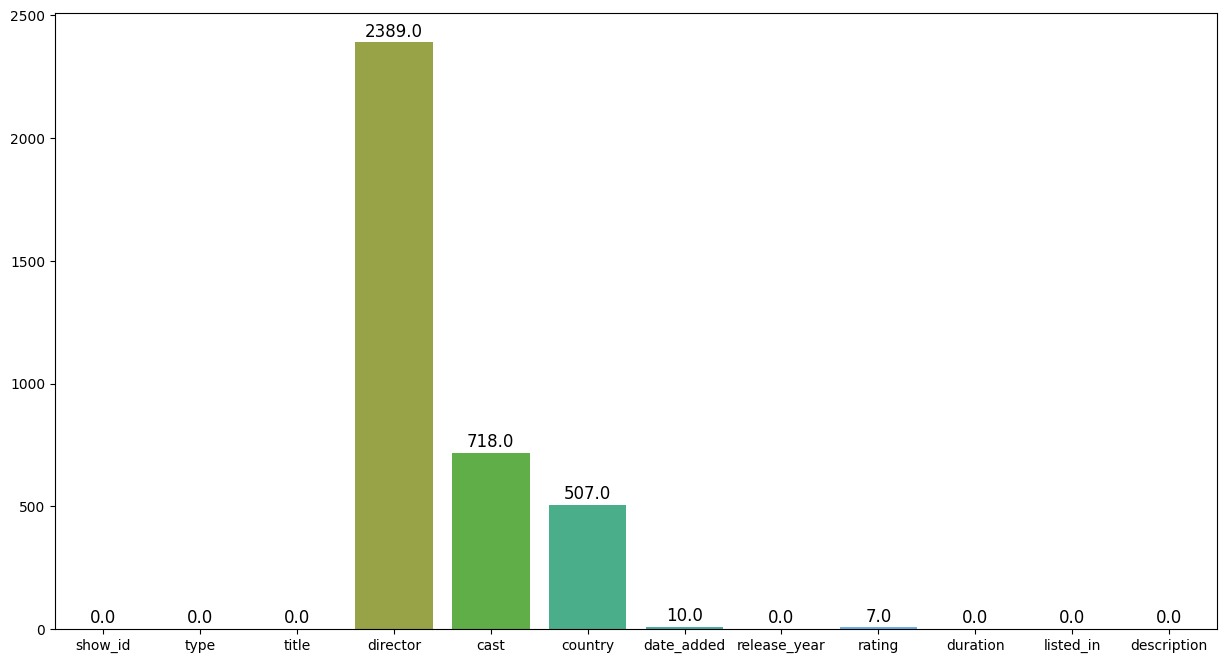

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()


### What did you know about your dataset?


*   The Dataset is having 7787 rows and 12 columns.
*   Director column has the 30 %  null values , cast and country columns with 9.2 and 6.7 % of null values respectively.
*   There are no duplicate values present in the dataset.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id:** Unique identifier for each movie/show.

2. **type:** Indicates whether the entry is a movie or a TV show.

3. **title:** Name of the movie or TV show.

4. **director:** Name of the director(s) of the movie or TV show.

5. **cast:** Names of the actors and actresses featured in the movie or TV show.

6. **country:** Country or countries where the movie or TV show was produced.

7. **date_added:** Date when the movie or TV show was added to Netflix.

8. **release_year:** Year when the movie or TV show was released.

9. **rating:** TV rating or movie rating of the movie or TV show.

10. **duration:** Length of the movie or TV show in minutes or seasons.

11. **listed_in:** Categories or genres of the movie or TV show.

12. **description:** Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*32)
for i in df.columns:
  print(f" {i} : {df[i].nunique()}")

The number of unique values in: 
--------------------------------
 show_id : 7787
 type : 2
 title : 7787
 director : 4049
 cast : 6831
 country : 681
 date_added : 1565
 release_year : 73
 rating : 14
 duration : 216
 listed_in : 492
 description : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
def all_columns_info(df):
     mis_val = df.isna().sum()
     mis_val_percent = 100 * mis_val / len(df)
     unique_val = df.nunique()
     aci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
     aci_table = aci_table.rename(columns={0: "No of Null Values", 1: "% of null values", 2: "No of unique values"})
     aci_table["Data Type"] = df.dtypes
     aci_table = aci_table.sort_values("% of null values", ascending=False).round(1)
     print(f"Selected DataFrame has {df.shape[1]} columns and {df.shape[0]} rows.")
     return aci_table

In [15]:
# Applying the function all columns information
all_columns_info(df)

Selected DataFrame has 12 columns and 7787 rows.


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


In [16]:
# check for unique ratings
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA:** This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R:** This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13:** This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14:** This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG:** This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR:** This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G:** This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y:** This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7:** This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG:** This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G:** This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17:** This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV:** This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR:** This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:

* Adult Content: TV-MA, NC-17, R
* Children Content: TV-PG, PG, TV-G, G
* Teen Content: PG-13, TV-14
* Family-friendly Content: TV-Y, TV-Y7, TV-Y7-FV
* Not Rated: NR, UR


In [17]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)

In [18]:
# Create new features to store date, day, month and year seperately :
# First convert date_added to date time format.
df["date_added"] = pd.to_datetime(df['date_added'])
  
# Create day column 
df['day_added'] = df['date_added'].dt.day   

# Create year column         
df['year_added'] = df['date_added'].dt.year

# Create month column
df['month_added'] = df['date_added'].dt.month 

# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

In [19]:
# Checking the dataset after binning
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adult Content,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0


In [20]:
# changing the dtype to string
df['type']= df['type'].astype('string')
df['title']= df['title'].astype('string')
df['director']= df['director'].astype('string')
df['cast']= df['cast'].astype('string')
df['country']= df['country'].astype('string')
df['rating']= df['rating'].astype('string')
df['listed_in']= df['listed_in'].astype('string')
df['description']= df['description'].astype('string')

In [21]:
# Splitting datasets for movies and tv show
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

In [22]:
# shape of new dataframes
print(f'shape of movies is : ',df_movies.shape)
print(f'shape of TV shows is : ',df_tvshows.shape)

shape of movies is :  (5377, 15)
shape of TV shows is :  (2410, 15)


In [23]:
# Checking the new spitted dataset
df_tvshows.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,<NA>,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adult Content,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0


In [24]:
# Checking the new spitted dataset
df_movies.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adult Content,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0


In [25]:
# checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   string        
 2   title         7787 non-null   string        
 3   director      5398 non-null   string        
 4   cast          7069 non-null   string        
 5   country       7280 non-null   string        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   string        
 9   duration      7787 non-null   int64         
 10  listed_in     7787 non-null   string        
 11  description   7787 non-null   string        
 12  day_added     7777 non-null   float64       
 13  year_added    7777 non-null   float64       
 14  month_added   7777 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

### What all manipulations have you done and insights you found?

1.	The function was created which provides null values along with percentage of null count, unique values and datatype of each features.
2.	The 'rating' column contains various coded categories, following 5 bins were created for all categories.
*   Adult: TV-MA, NC-17
*   Restricted: R, UR
*   Teen: PG-13, TV-14
*   All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
*   Not Rated: NR
3.	We have typecasted the following features: 'duration' into integer (Removing min and seasons from the values). 'date_added' to datetime (Into the required format). 
4.	The following features were  extracted :

*   'date' from 'date_added'.
*   'month' from 'date_added'.
*   'year' from 'date_added'.
4.	The datatypes were converted  to some Suitable columns from object type to string format to make the data processing easier.
5.	The dataset was splitted  into two dataframe one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for  further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

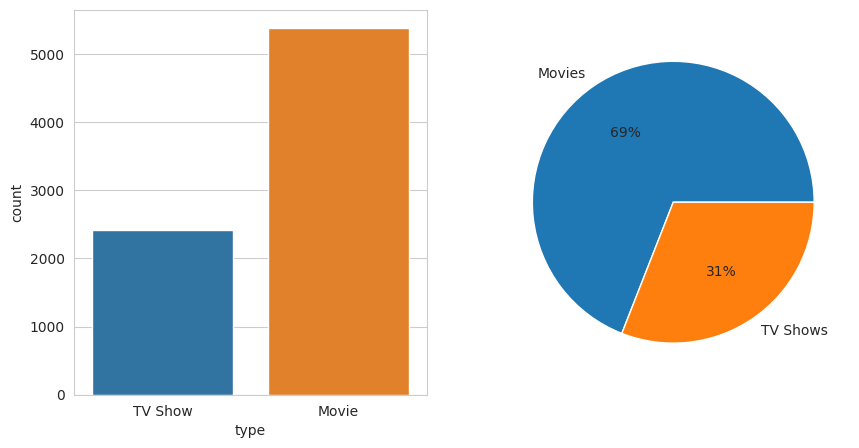

In [26]:
# Chart - 1 visualization code of number of Movies and TV Show 
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
sns.countplot(x=df['type'],ax=ax[0])
#Pie Chart 
labels = 'Movies' , 'TV Shows'
ax[1].pie(df['type'].value_counts(), labels=labels, autopct='%0.0f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

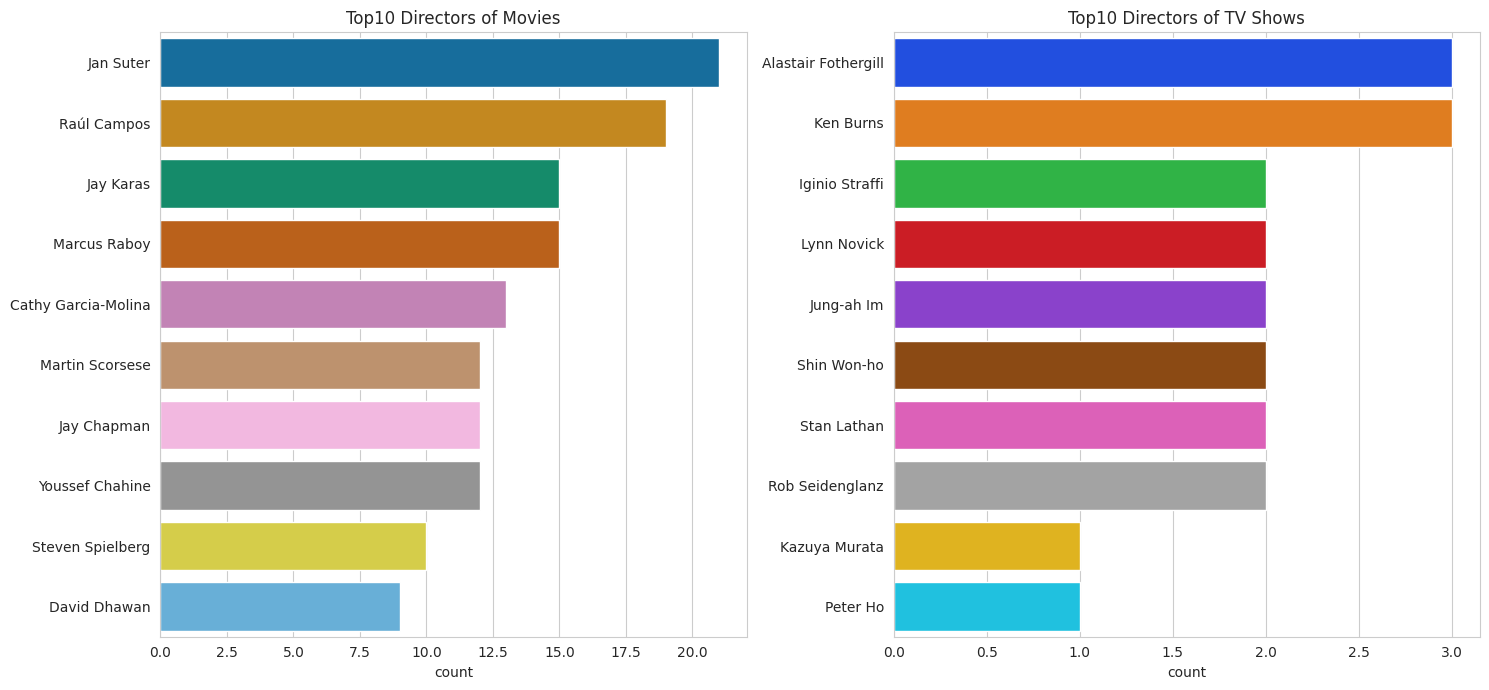

In [27]:
# Chart - 2 visualization code of Top 10 directors
# #Analysing top10 directors of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
filtered_directors_movies = df_movies[df_movies.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_directors_movies,data=df_movies,order=filtered_directors_movies.value_counts().index[0:10],  palette='colorblind', ax=ax[0])
ax[0].set_title('Top10 Directors of Movies')
# #Analysing top10 directors of TVSHOWS
filtered_directors_tvshows = df_tvshows[df_tvshows.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_directors_tvshows,data=df_tvshows,order=filtered_directors_tvshows.value_counts().index[0:10], palette='bright', ax=ax[1])
ax[1].set_title('Top10 Directors of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 1.0, 'Monthwise added TV shows and Movies')

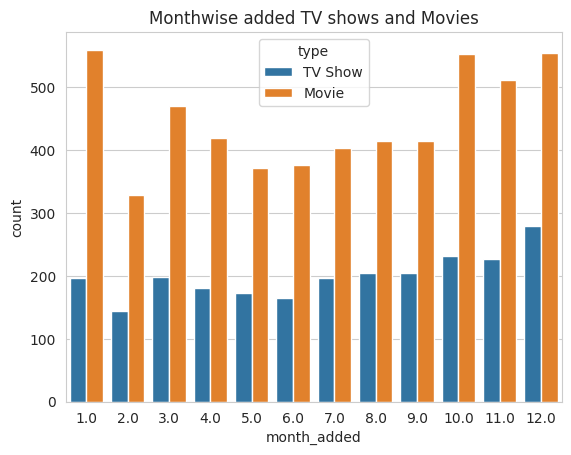

In [28]:
# Chart - 3 visualization of movies and Tv shows month wise
sns.countplot(x='month_added',hue='type',data=df)
plt.title('Monthwise added TV shows and Movies')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

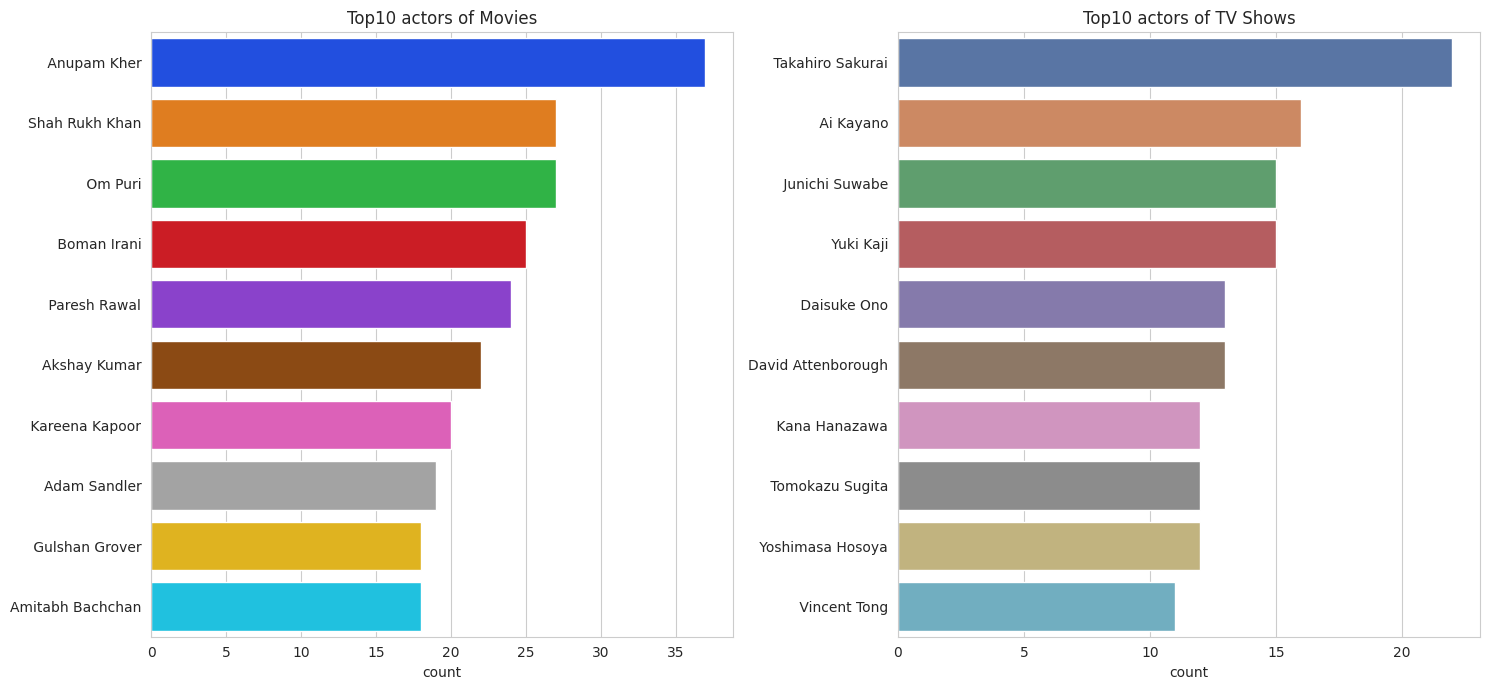

In [29]:
# Chart - 4 visualization code of top ten actors 
# Analysing top10 actors of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
filtered_cast_movies = df_movies[df_movies.cast != 'No Cast'].set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_cast_movies,data=df_movies,order=filtered_cast_movies.value_counts().index[0:10],  palette='bright', ax=ax[0])
ax[0].set_title('Top10 actors of Movies')
# Analysing top10 actors of TVSHOWS
filtered_cast_tvshows = df_tvshows[df_tvshows.cast != 'No Cast'].set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_cast_tvshows,data=df_tvshows,order=filtered_cast_tvshows.value_counts().index[0:10], palette='deep', ax=ax[1])
ax[1].set_title('Top10 actors of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

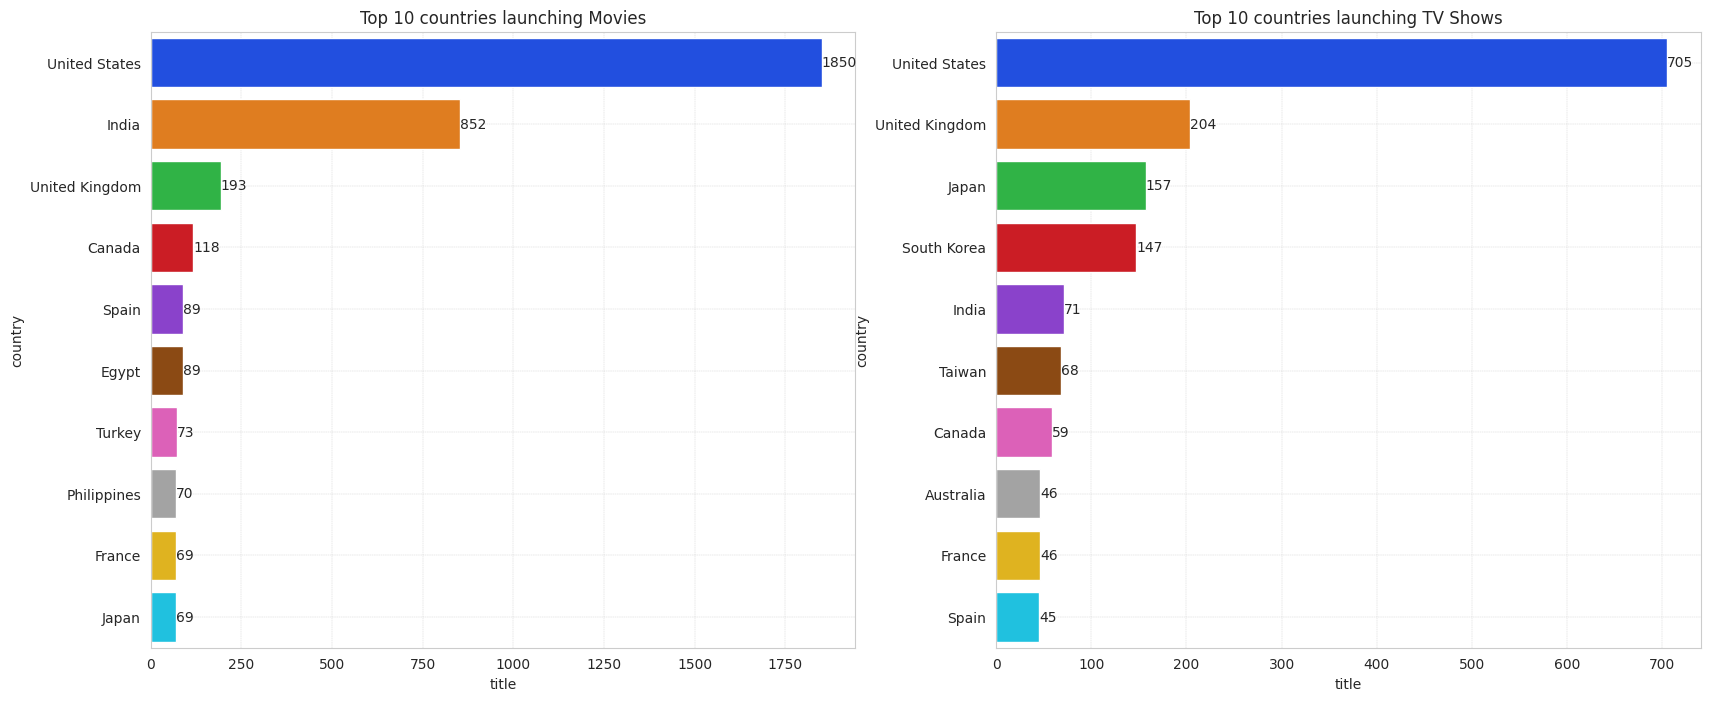

In [30]:
# Chart - 5 visualization code top 10 countries launching movies
plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "country",x = 'title', data = df_country, palette='bright')
  plt.title(f'Top 10 countries launching {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

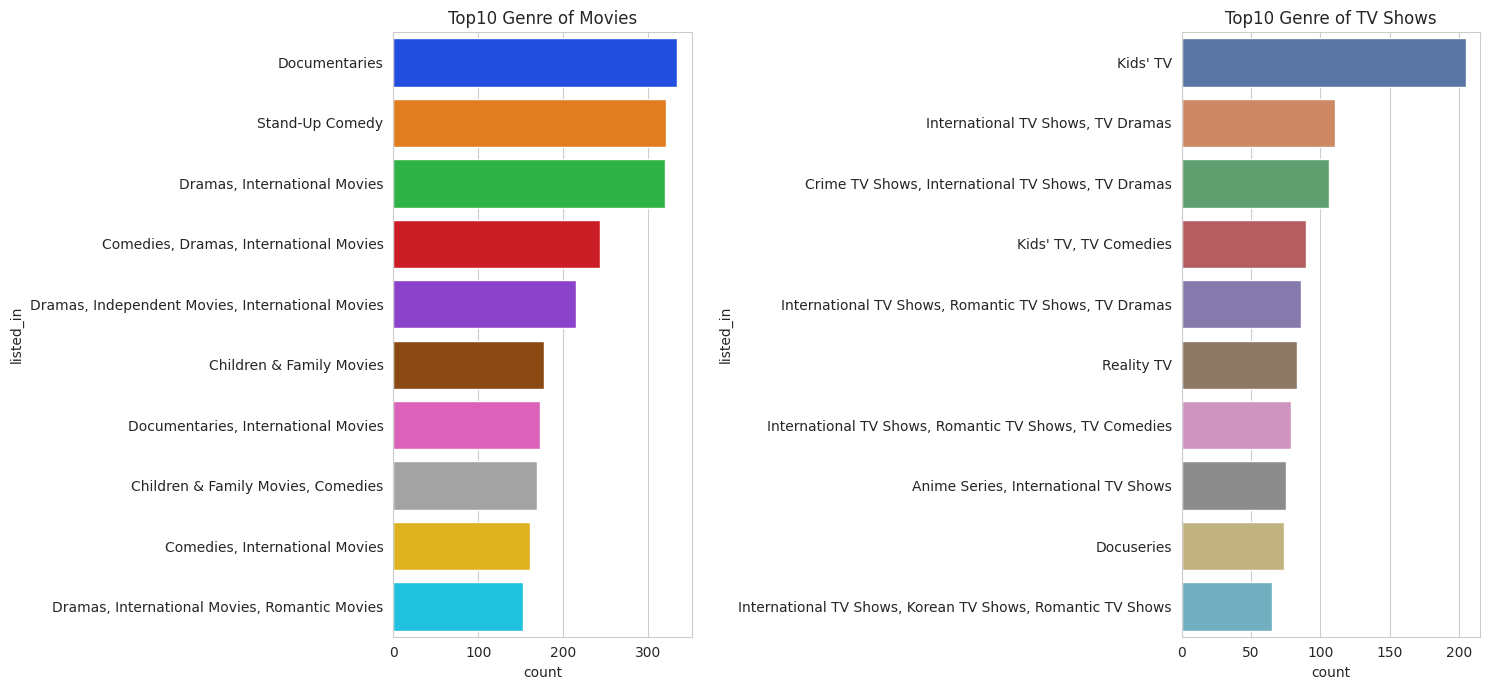

In [31]:
# Chart - 6 visualization code top10 genre of the movies and TV shows
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.countplot(y=df_movies['listed_in'],data=df_movies,order=df_movies['listed_in'].value_counts().index[0:10],  palette='bright', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=df_tvshows['listed_in'],data=df_tvshows,order=df_tvshows['listed_in'].value_counts().index[0:10], palette='deep', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

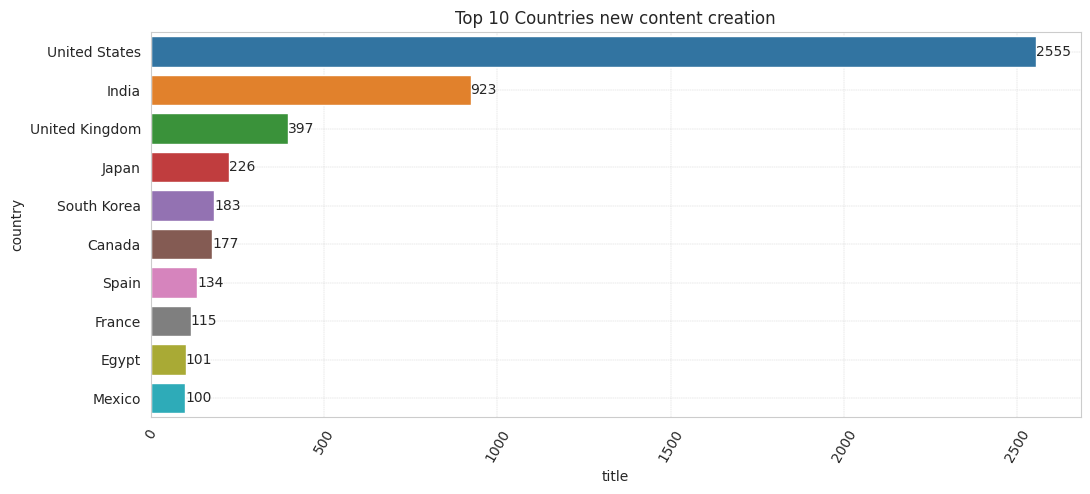

In [75]:
# Chart - 7 visualization code Top 10 Countries new content creation
filtered_countries = df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(12,5))
plots= sns.barplot(y = "country",x = 'title', data = filtered_countries)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries new content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

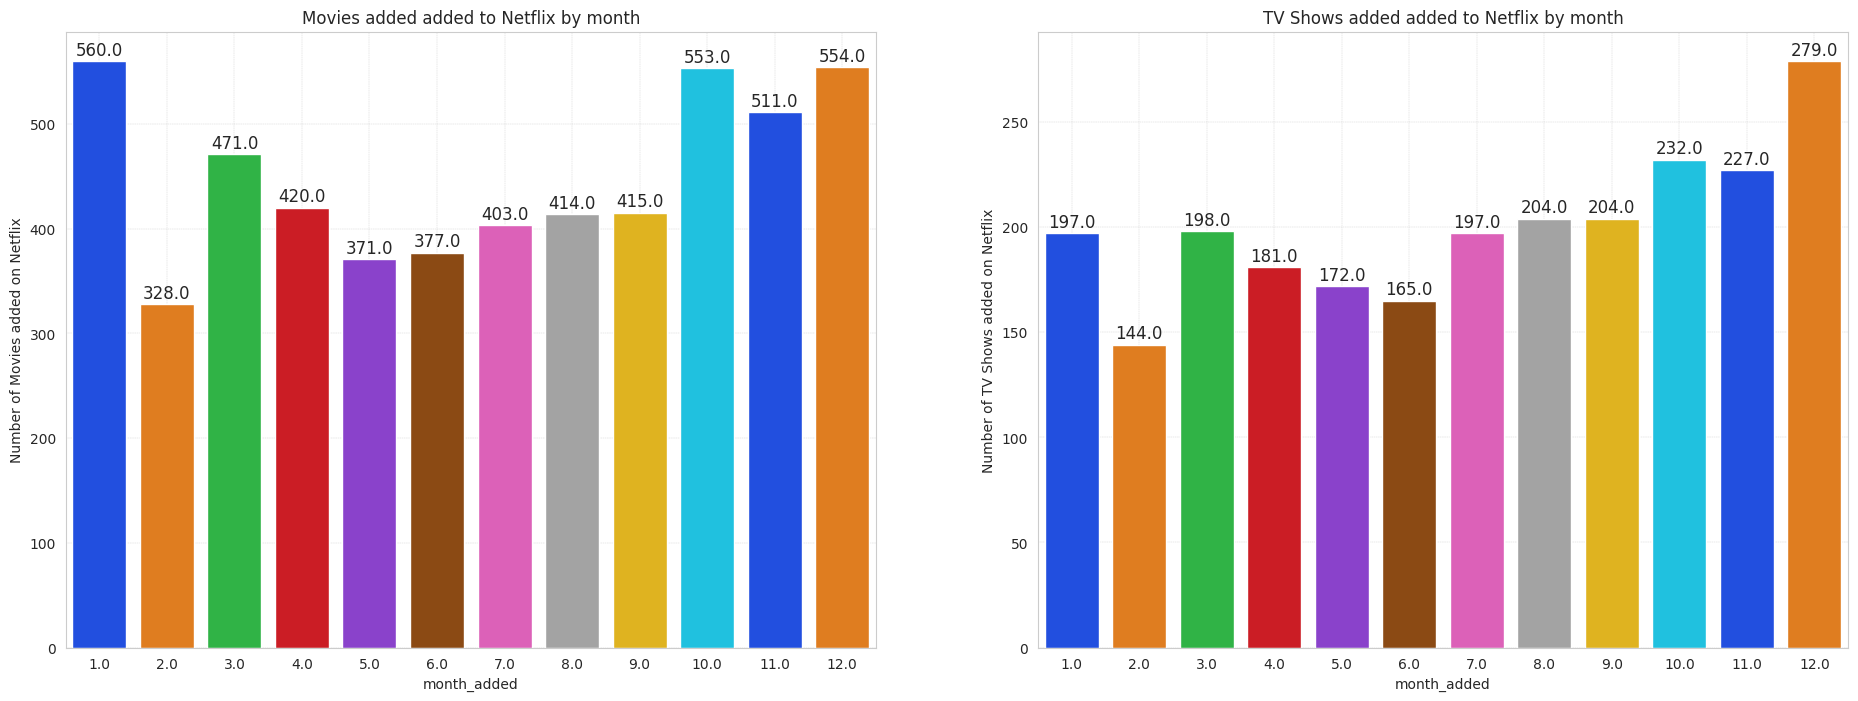

In [76]:
# Chart - 8 visualization code of movie and Tv shows added in netflix monthwise
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='bright')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

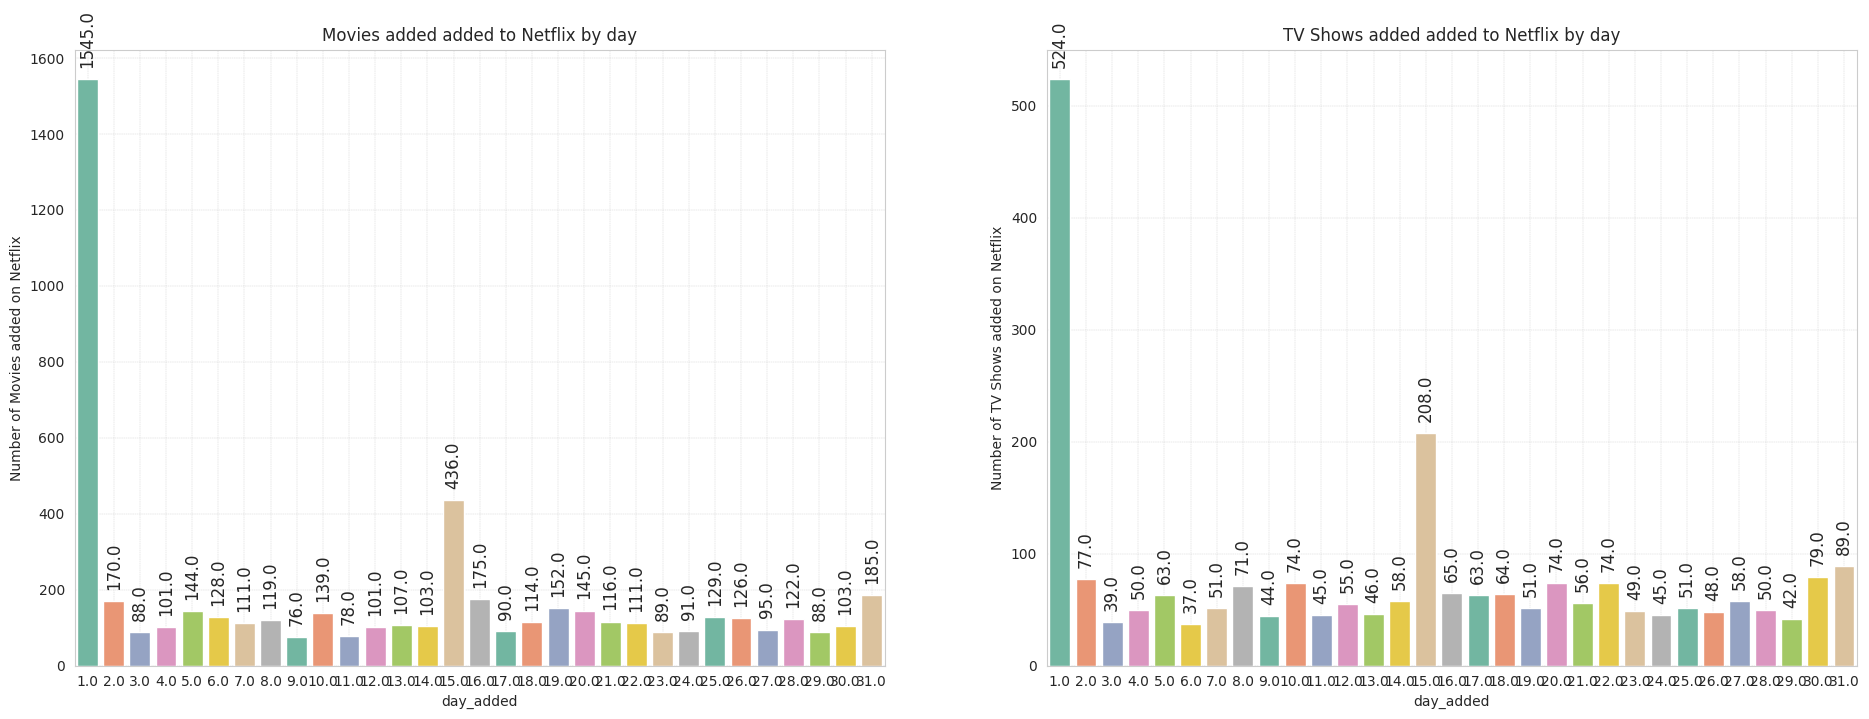

In [77]:
# Chart - 9 visualization code of movie and TV shows added in daywise
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette="Set2")
  plt.title(f'{j} added added to Netflix by day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=12, xytext=(0, 8),
                    textcoords='offset points', rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

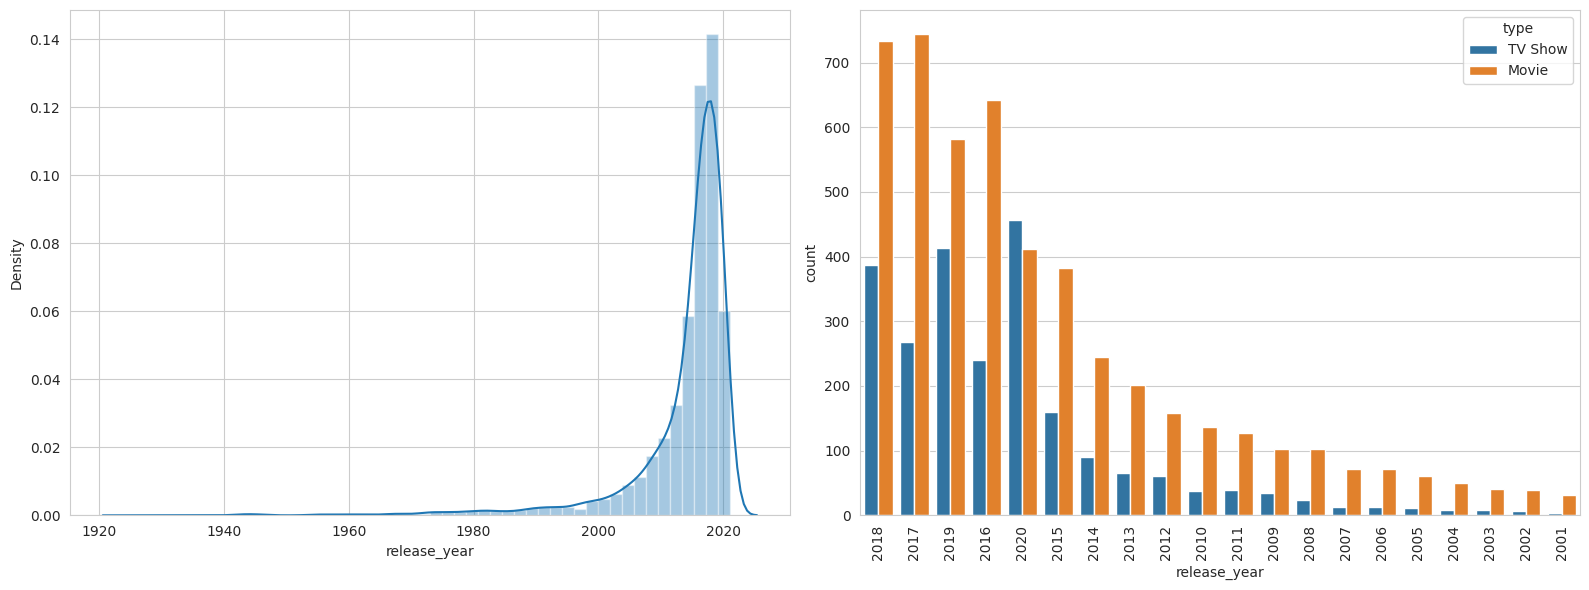

In [78]:
# Chart - 10 visualization code of movies and Tv shows releasing years
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6)) 
sns.distplot(df['release_year'],ax=ax[0])
sns.countplot(data=df,x='release_year',hue='type',order=df.release_year.value_counts().iloc[:20].index,ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

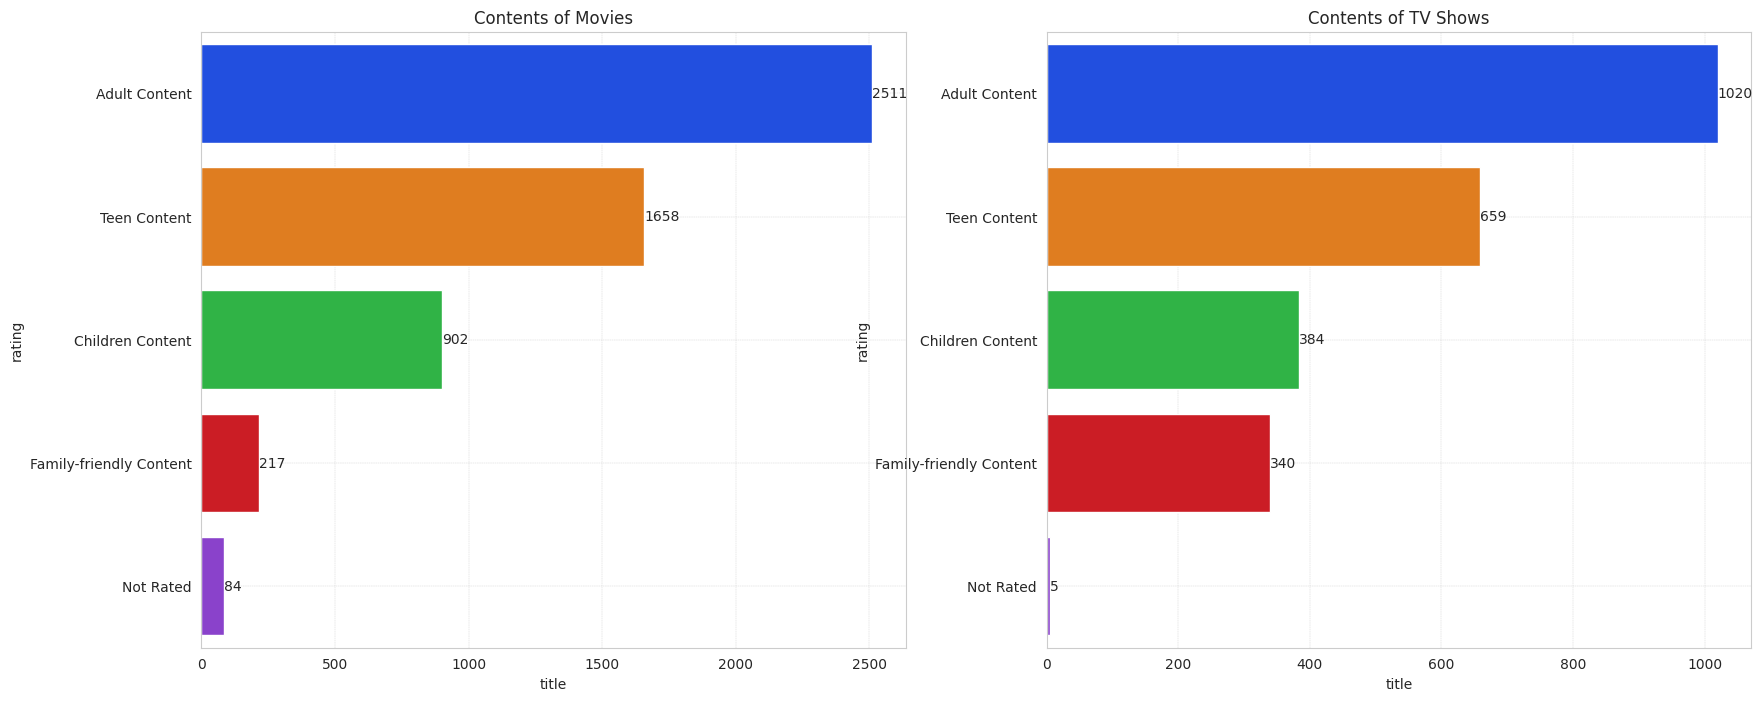

In [83]:
# Chart - 11 visualization code of contents of movies and tv shows
plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
  plots= sns.barplot(y = "rating",x = 'title', data = df_country, palette='bright')
  plt.title(f'Contents of {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

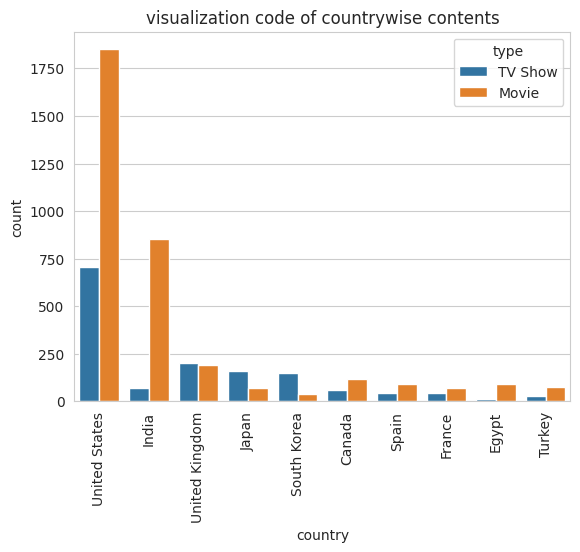

In [85]:
# Chart - 12 visualization code of countrywise contents
cty=df[df['country']!=' ']
sns.countplot(data=cty,x='country',hue='type',order=cty.country.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('visualization code of countrywise contents')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

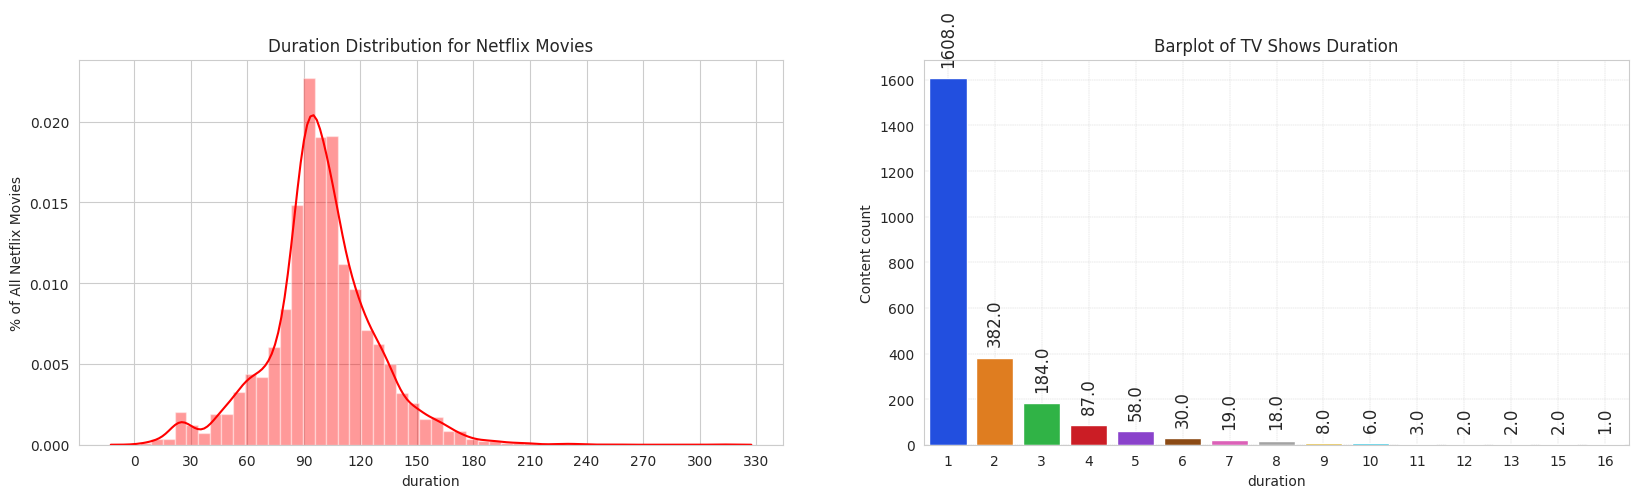

In [89]:
# Chart - 13 visualization code of Duration of movies and Tv shows
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(df_movies.duration, color='red',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")

df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='bright')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points', rotation=90)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [90]:
# Correlation Heatmap visualization code
# Creating data for top 10 countries
df['count'] = 1
data= df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending = False).reset_index()[:10]
data = data['country']
data

0     United States
1             India
2    United Kingdom
3             Japan
4       South Korea
5            Canada
6             Spain
7            France
8             Egypt
9            Mexico
Name: country, dtype: string

In [91]:
# Data preparation for heatmap
df['count'] = 1
# Top 10 countries based on count
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:12]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap

country,Australia,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,Turkey,United Kingdom,United States
rating,,,,,,,,,,,,
Adult Content,0.463415,0.435028,0.277228,0.669565,0.249187,0.364444,0.73,0.453552,0.828358,0.50,0.501259,0.487853
Children Content,0.219512,0.254237,0.039604,0.052174,0.157096,0.200000,0.07,0.087432,0.052239,0.11,0.244332,0.192398
Family-friendly Content,0.134146,0.152542,0.000000,0.104348,0.019502,0.080000,0.02,0.060109,0.014925,0.00,0.052897,0.068574
Not Rated,0.024390,0.011299,0.000000,0.008696,0.006501,0.000000,0.04,0.016393,0.007463,0.03,0.012594,0.014107
Teen Content,0.158537,0.146893,0.683168,0.165217,0.567714,0.355556,0.14,0.382514,0.097015,0.36,0.188917,0.237069


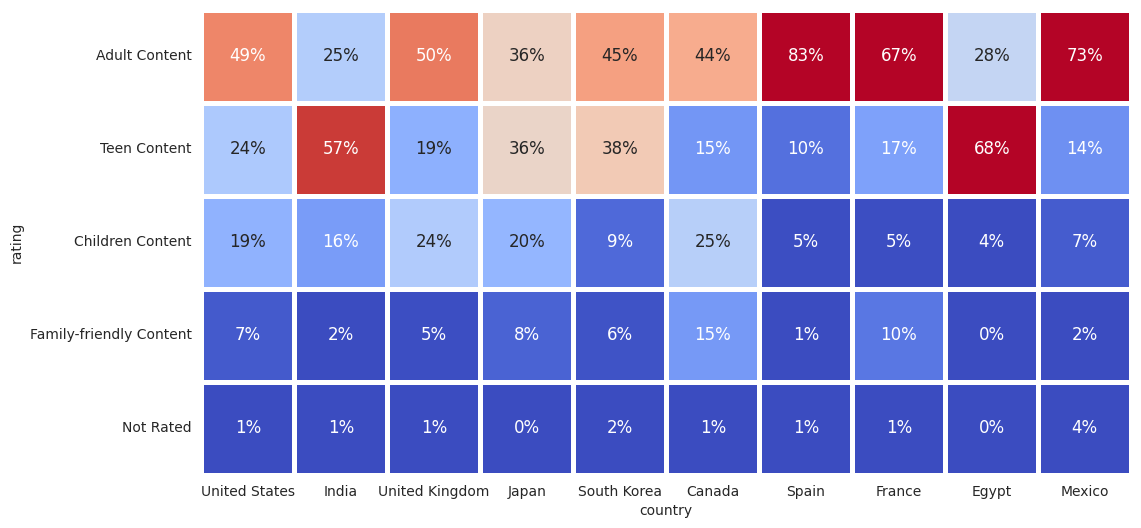

In [99]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# setting order
country_order = ['United States', 'India', 'United Kingdom','Japan', 'South Korea', 'Canada', 'Spain', 'France','Egypt', 'Mexico']

age_order = ['Adult Content','Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order],cmap='coolwarm',square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [100]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'year_added', 'month_added', 'count'],
      dtype='object')

#### Chart - 15 - Pair Plot 

Text(0.5, 1.0, 'Duration of contents v/s Rating')

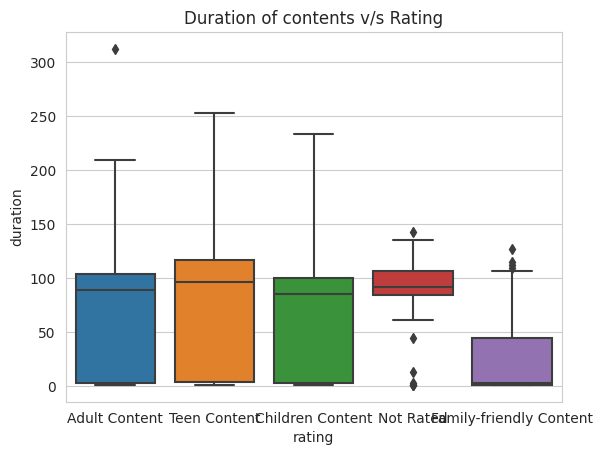

In [101]:
# Pair Plot visualization code
sns.boxplot(x=df['rating'],y=df['duration'])
plt.title('Duration of contents v/s Rating')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [45]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
# Expand Contraction

#### 2. Lower Casing

In [48]:
# Lower Casing

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [51]:
# Remove Stopwords

In [52]:
# Remove White spaces

#### 6. Rephrase Text

In [53]:
# Rephrase Text

#### 7. Tokenization

In [54]:
# Tokenization

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [56]:
# POS Taging

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [58]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [59]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [60]:
# Transform Your data

### 6. Data Scaling

In [61]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [62]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [64]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [65]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [70]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***